In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Input Dataset

In [2]:
df=pd.read_csv("bank-additional-full.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# View Null Values

In [4]:
(df=="unknown").sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
percentage = ((df=="unknown").sum()/41188)*100
percentage

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

# Handling missing values

Default has 20% missing data so need to be handled carefuly

See distribution of Default Class

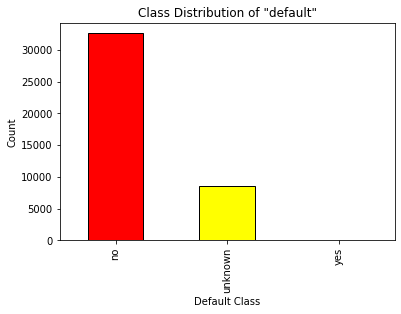

In [6]:
df['default'].value_counts().plot(kind='bar',color=["red","yellow","green"], edgecolor="black")
plt.title('Class Distribution of "default"')
plt.xlabel('Default Class')
plt.ylabel('Count')
plt.show()

In [7]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Most customer is on class No, so need to see the customer that's yes

In [8]:
df["default"]=df["default"].replace(["unknown"],"no")
df["default"].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [9]:
df[df["default"]=="yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


yes class all have no y class, and only 3 customer that's yes, can be assumed that unknown can be changed into no

In [10]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
df['y'].value_counts()/41188 * 100

no     88.734583
yes    11.265417
Name: y, dtype: float64

### Check unique values
Check other distribution of classes

In [12]:
for col in df:
    unique = df[col].value_counts()
    print(unique)
    print('==============\n')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

no     41185
yes        3
Name: default, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950
yes         6248
unknown 

Other unknown values can be dropped since its a small amount

In [13]:
df2 = df.drop(df[df['job'] == 'unknown'].index)
df2 = df2.drop(df2[df2['marital'] == 'unknown'].index)
df2 = df2.drop(df2[df2['education'] == 'unknown'].index)
df2 = df2.drop(df2[df2['housing'] == 'unknown'].index)
df2 = df2.drop(df2[df2['loan'] == 'unknown'].index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         38245 non-null  object 
 5   housing         38245 non-null  object 
 6   loan            38245 non-null  object 
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp.var.rate    38245 non-null  float64
 16  cons.price.idx  38245 non-null  float64
 17  cons.conf.idx   38245 non-null 

In [14]:
(df2=="unknown").sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From 41188 to 38245, 2943 data have been dropped. 92% from original data is used

# EDA
Exploring data distribution

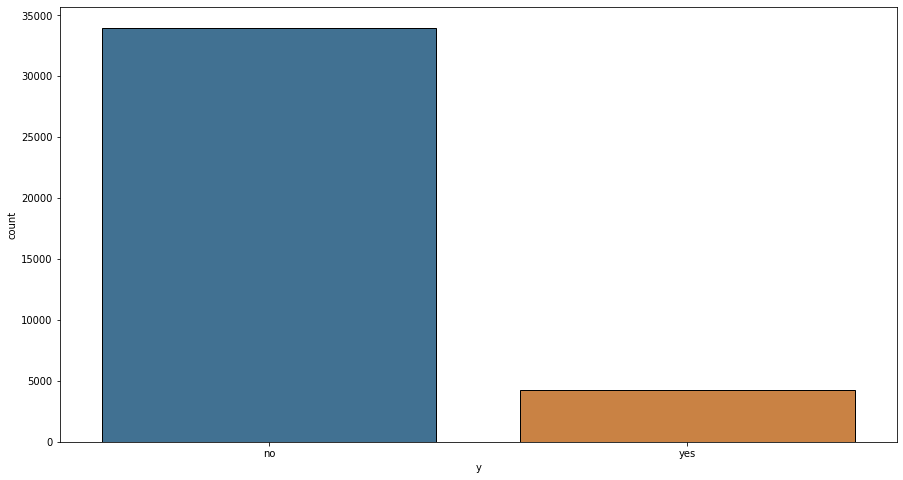

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df2['y'], edgecolor='black', saturation=0.55)
plt.show()

In [16]:
df2['y'].value_counts()

no     33987
yes     4258
Name: y, dtype: int64

In [17]:
df2['y'].value_counts()/41188 * 100

no     82.516752
yes    10.337963
Name: y, dtype: float64

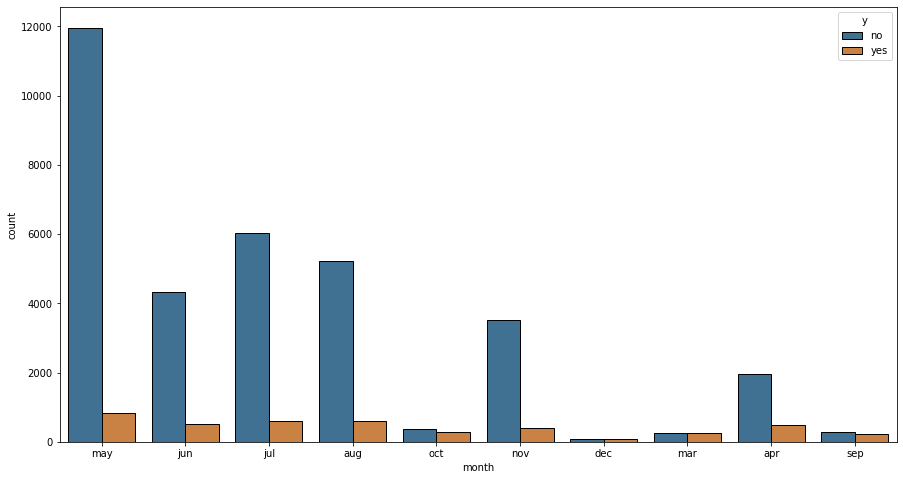

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df2['month'], edgecolor='black', saturation=0.55, hue=df['y'])
plt.show()

In [19]:
df2['month'].value_counts()

may    12794
jul     6630
aug     5822
jun     4846
nov     3898
apr     2436
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

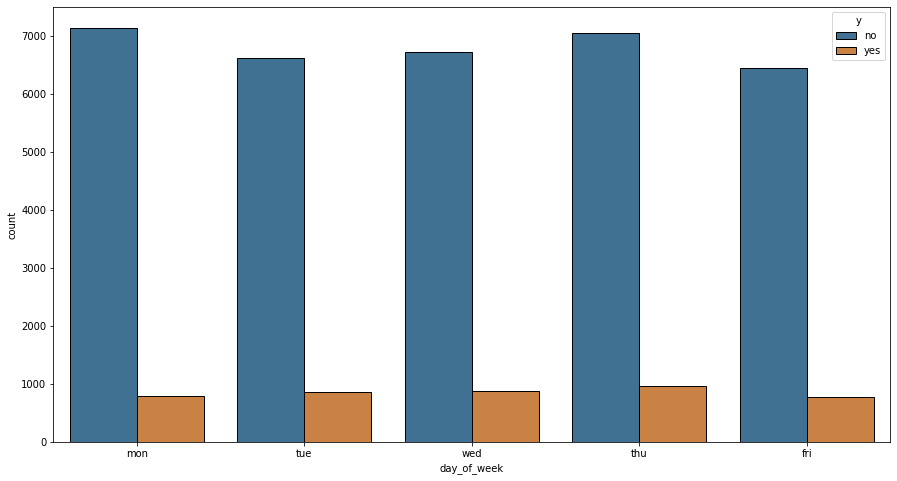

In [20]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df2['day_of_week'], edgecolor='black', saturation=0.55, hue=df['y'])
plt.show()

In [21]:
df2['day_of_week'].value_counts()

thu    8011
mon    7927
wed    7602
tue    7481
fri    7224
Name: day_of_week, dtype: int64

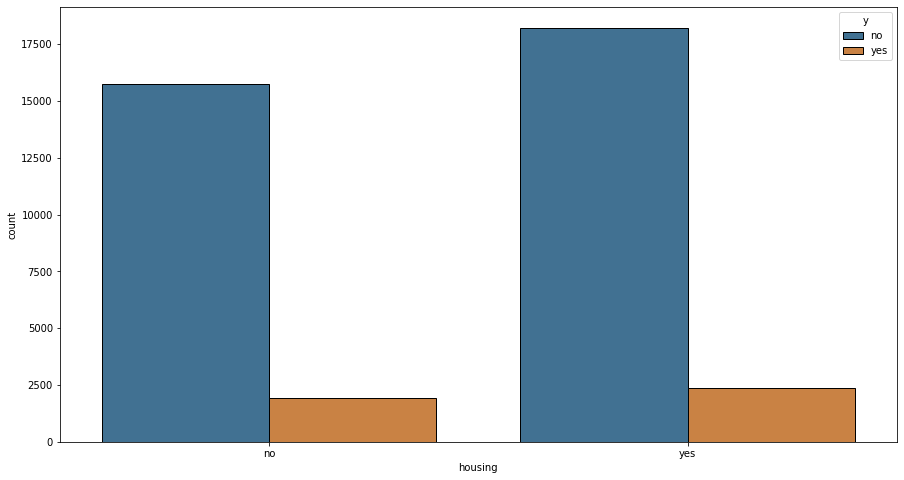

In [22]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df2['housing'], edgecolor='black', saturation=0.55, hue=df['y'])
plt.show()

In [23]:
df2['housing'].value_counts()

yes    20578
no     17667
Name: housing, dtype: int64

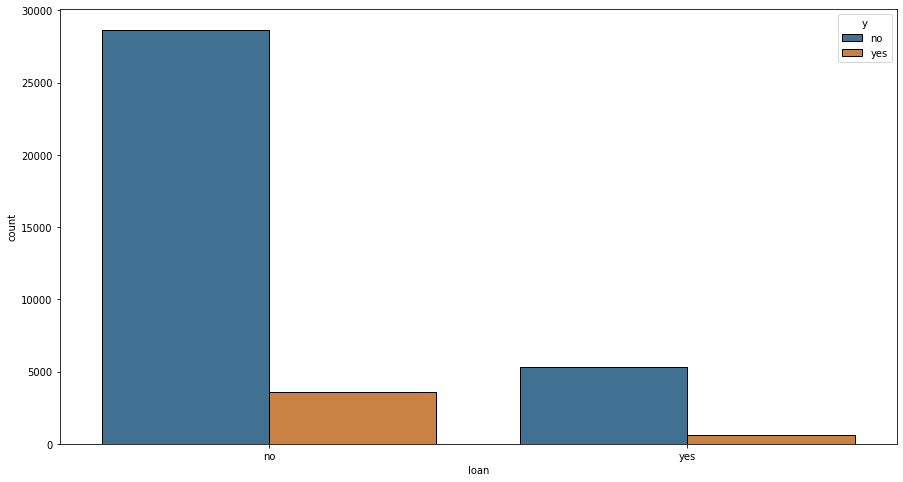

In [24]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df2['loan'], edgecolor='black', saturation=0.55, hue=df['y'])
plt.show()

In [25]:
df2['housing'].value_counts()

yes    20578
no     17667
Name: housing, dtype: int64

# Encoding

In [26]:
ord_enc = OrdinalEncoder()
df2["job_code"] = ord_enc.fit_transform(df2[["job"]])
df2["marital_code"] = ord_enc.fit_transform(df2[["marital"]])
df2["education_code"] = ord_enc.fit_transform(df2[["education"]])
df2["default_code"] = ord_enc.fit_transform(df2[["default"]])
df2["housing_code"] = ord_enc.fit_transform(df2[["housing"]])
df2["loan_code"] = ord_enc.fit_transform(df2[["loan"]])
df2["contact_code"] = ord_enc.fit_transform(df2[["contact"]])
df2["month_code"] = ord_enc.fit_transform(df2[["month"]])
df2["day_of_week_code"] = ord_enc.fit_transform(df2[["day_of_week"]])
df2["poutcome_code"] = ord_enc.fit_transform(df2[["poutcome"]])
df2["y_code"] = ord_enc.fit_transform(df2[["y"]])

for col in df2:
    unique = df2[col].value_counts()
    print(unique)
    print('==============\n')

31    1858
32    1757
33    1742
36    1678
35    1654
      ... 
98       2
89       2
95       1
87       1
94       1
Name: age, Length: 77, dtype: int64

admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64

married     23183
single      10760
divorced     4302
Name: marital, dtype: int64

university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: education, dtype: int64

no     38242
yes        3
Name: default, dtype: int64

yes    20578
no     17667
Name: housing, dtype: int64

no     32286
yes     5959
Name: loan, dtype: int64

cellular     24441
telephone    13804
Name: contact, dtype: int64

may    12794
jul     6630
aug

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               38245 non-null  int64  
 1   job               38245 non-null  object 
 2   marital           38245 non-null  object 
 3   education         38245 non-null  object 
 4   default           38245 non-null  object 
 5   housing           38245 non-null  object 
 6   loan              38245 non-null  object 
 7   contact           38245 non-null  object 
 8   month             38245 non-null  object 
 9   day_of_week       38245 non-null  object 
 10  duration          38245 non-null  int64  
 11  campaign          38245 non-null  int64  
 12  pdays             38245 non-null  int64  
 13  previous          38245 non-null  int64  
 14  poutcome          38245 non-null  object 
 15  emp.var.rate      38245 non-null  float64
 16  cons.price.idx    38245 non-null  float6

# Feature Selection

### Feature engineering
Create a feature that could be predictive -> client-bank relationship (combination of housing, loan, default) to see if there's a client-bank relationship with the customer.

In [28]:
conditions=[(df2['loan_code']==1) | (df2['housing_code']==1) | (df2['default_code']==1),
          (df2['loan_code']==0) & (df2['housing_code']==0) & (df2['default_code']==0)]

values = [1,0]
df2['cbr'] = np.select(conditions, values)
df2['cbr'].value_counts()

1    23021
0    15224
Name: cbr, dtype: int64

### Creating Sub Samples

Randomizing df for sub samples

In [29]:
df2 = df2.sample(frac=1)

yes_df = df2.loc[df2['y_code'] == 1]
no_df = df2.loc[df2['y_code'] == 0][:4258]

normal_distributed_df = pd.concat([yes_df, no_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_code,default_code,housing_code,loan_code,contact_code,month_code,day_of_week_code,poutcome_code,y_code,cbr
38533,24,technician,single,university.degree,no,no,no,cellular,oct,wed,...,6.0,0.0,0.0,0.0,0.0,8.0,4.0,1.0,0.0,0
24778,50,technician,married,professional.course,no,yes,no,cellular,nov,tue,...,5.0,0.0,1.0,0.0,0.0,7.0,3.0,1.0,1.0,1
22548,49,unemployed,married,high.school,no,yes,no,cellular,aug,fri,...,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
33288,34,unemployed,single,high.school,no,yes,no,telephone,may,tue,...,3.0,0.0,1.0,0.0,1.0,6.0,3.0,1.0,0.0,1
4652,42,admin.,single,university.degree,no,yes,yes,telephone,may,wed,...,6.0,0.0,1.0,1.0,1.0,6.0,4.0,1.0,1.0,1


View new df

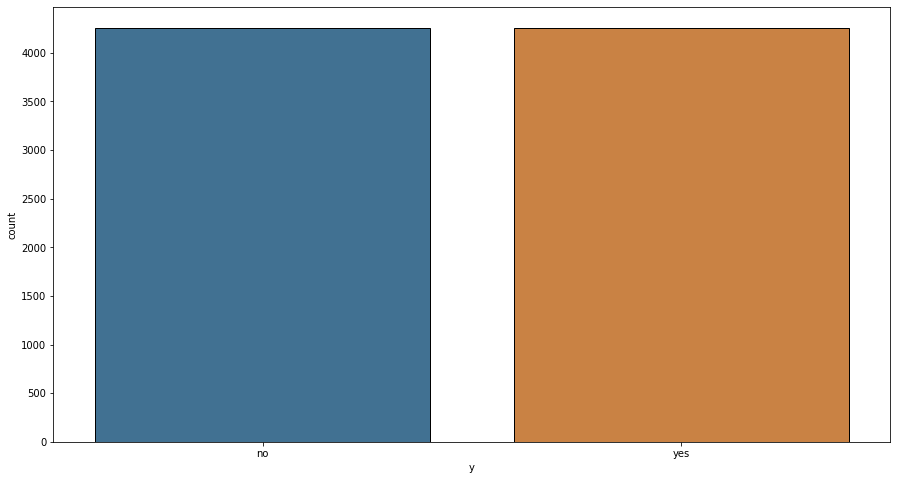

In [30]:
plt.figure(figsize=(15, 8))
sns.countplot(x=new_df['y'], edgecolor='black', saturation=0.55)
plt.show()

In [31]:
new_df['y'].value_counts()

no     4258
yes    4258
Name: y, dtype: int64

In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 38533 to 4222
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8516 non-null   int64  
 1   job               8516 non-null   object 
 2   marital           8516 non-null   object 
 3   education         8516 non-null   object 
 4   default           8516 non-null   object 
 5   housing           8516 non-null   object 
 6   loan              8516 non-null   object 
 7   contact           8516 non-null   object 
 8   month             8516 non-null   object 
 9   day_of_week       8516 non-null   object 
 10  duration          8516 non-null   int64  
 11  campaign          8516 non-null   int64  
 12  pdays             8516 non-null   int64  
 13  previous          8516 non-null   int64  
 14  poutcome          8516 non-null   object 
 15  emp.var.rate      8516 non-null   float64
 16  cons.price.idx    8516 non-null   floa

In [33]:
new_df = new_df.select_dtypes(exclude=['object'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 38533 to 4222
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8516 non-null   int64  
 1   duration          8516 non-null   int64  
 2   campaign          8516 non-null   int64  
 3   pdays             8516 non-null   int64  
 4   previous          8516 non-null   int64  
 5   emp.var.rate      8516 non-null   float64
 6   cons.price.idx    8516 non-null   float64
 7   cons.conf.idx     8516 non-null   float64
 8   euribor3m         8516 non-null   float64
 9   nr.employed       8516 non-null   float64
 10  job_code          8516 non-null   float64
 11  marital_code      8516 non-null   float64
 12  education_code    8516 non-null   float64
 13  default_code      8516 non-null   float64
 14  housing_code      8516 non-null   float64
 15  loan_code         8516 non-null   float64
 16  contact_code      8516 non-null   floa

In [34]:
for col in new_df:
    unique = new_df[col].value_counts()
    print(unique)
    print('==============\n')

33    404
31    396
35    377
30    370
32    369
     ... 
98      2
84      2
89      2
87      1
91      1
Name: age, Length: 74, dtype: int64

80      33
107     32
106     30
101     30
135     30
        ..
1613     1
1217     1
1055     1
1102     1
1214     1
Name: duration, Length: 1375, dtype: int64

1     3893
2     2225
3     1065
4      499
5      307
6      187
7       98
8       55
9       42
10      36
11      31
12      19
17       9
14       9
15       7
13       4
29       4
16       4
22       3
18       3
31       2
21       2
28       2
23       1
20       1
42       1
34       1
19       1
26       1
41       1
43       1
35       1
39       1
Name: campaign, dtype: int64

999    7584
3       282
6       281
4        61
7        37
2        37
9        31
5        30
12       28
10       27
13       27
11       16
15       16
0        10
14       10
8        10
1         9
16        6
18        3
22        2
21        2
17        2
19        2
25        1
26     

View Correlation Between Variables

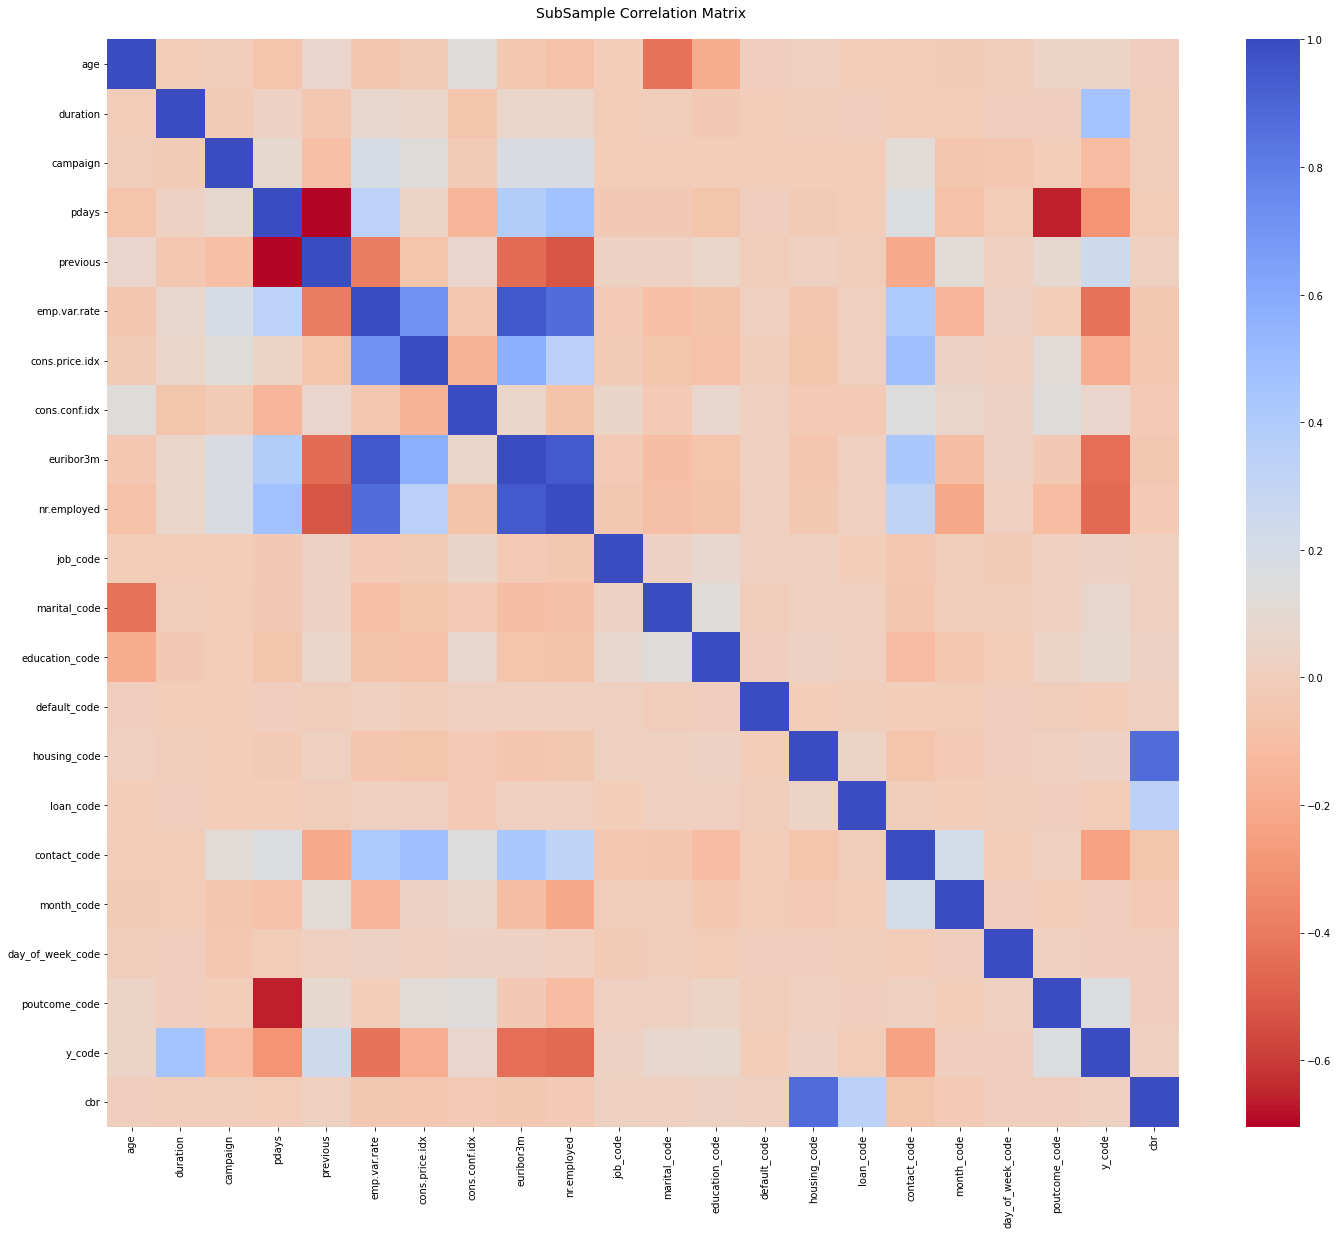

In [35]:
f, ax = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title('SubSample Correlation Matrix \n', fontsize=14)
plt.show()

In [36]:
corr = new_df.corr()
corr['y_code'] = abs(corr['y_code'])
sorted_corr = corr.sort_values(by=['y_code'], ascending=False)
sorted_corr['y_code']

y_code              1.000000
nr.employed         0.460408
duration            0.456936
euribor3m           0.440232
emp.var.rate        0.425010
pdays               0.300170
previous            0.246538
contact_code        0.239564
cons.price.idx      0.190354
poutcome_code       0.160611
campaign            0.113214
education_code      0.083962
marital_code        0.071491
cons.conf.idx       0.062293
age                 0.043039
job_code            0.029676
housing_code        0.025678
cbr                 0.017531
loan_code           0.014268
default_code        0.010837
day_of_week_code    0.005048
month_code          0.002854
Name: y_code, dtype: float64

Split data for testing with original data

### Feature Selection

Because Only a **few variables that have a significant correlation** with y class, so we only picked the **variables that we only need** 

We choose duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, euribor3m, nr.employed, and contact (correlation score >=0.2) 
But because duration can't be used for predictive model so it will be discarded

In [37]:
final_df=new_df[["pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "contact_code", "y_code"]]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8516 entries, 38533 to 4222
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pdays           8516 non-null   int64  
 1   previous        8516 non-null   int64  
 2   emp.var.rate    8516 non-null   float64
 3   cons.price.idx  8516 non-null   float64
 4   euribor3m       8516 non-null   float64
 5   nr.employed     8516 non-null   float64
 6   contact_code    8516 non-null   float64
 7   y_code          8516 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 598.8 KB


### Remove extreme outliers

Removing **extreme outliers** from high correlation variables (Correlation score > 0.4)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

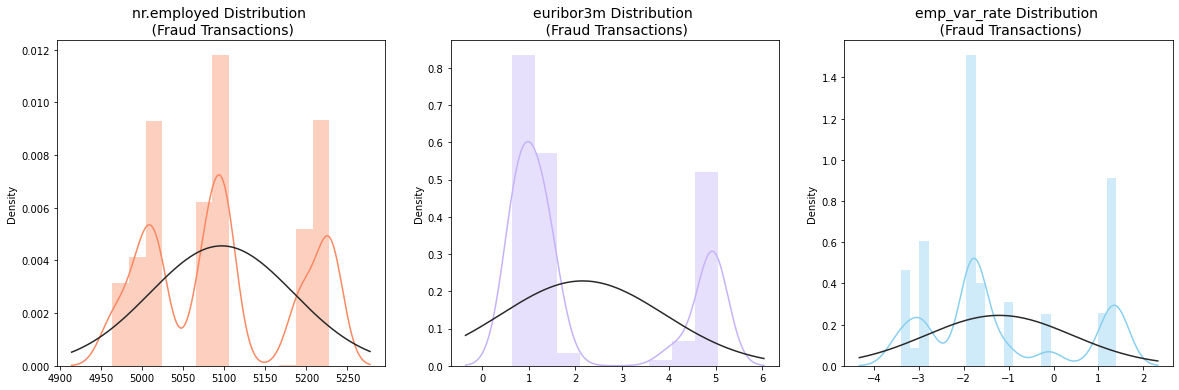

In [38]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

employed_dist = final_df['nr.employed'].loc[final_df['y_code'] == 1].values
sns.distplot(employed_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('nr.employed Distribution \n (Fraud Transactions)', fontsize=14)

euribor3m_dist = final_df['euribor3m'].loc[final_df['y_code'] == 1].values
sns.distplot(euribor3m_dist,ax=ax2, fit=norm, color='#C5B3F9')
ax2.set_title('euribor3m Distribution \n (Fraud Transactions)', fontsize=14)

emp_var_rate_dist = final_df['emp.var.rate'].loc[final_df['y_code'] == 1].values
sns.distplot(emp_var_rate_dist,ax=ax3, fit=norm, color='#89CFF0')
ax3.set_title('emp_var_rate Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [39]:
employed_df = final_df['nr.employed'].loc[final_df['y_code'] == 1].values
q25, q75 = np.percentile(employed_df, 25), np.percentile(employed_df, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
employed_iqr = q75 - q25
print('iqr: {}'.format(employed_iqr))

employed_cut_off = employed_iqr * 1.5
employed_lower, employed_upper = q25 - employed_cut_off, q75 + employed_cut_off
print('Cut Off: {}'.format(employed_cut_off))
print('nr.employed Lower: {}'.format(employed_lower))
print('nr.employed Upper: {}'.format(employed_upper))

outliers = [x for x in employed_df if x < employed_lower or x > employed_upper]
print('Feature nr.employed Outliers: {}'.format(len(outliers)))
print('nr.employed outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['nr.employed'] > employed_upper) | (final_df['nr.employed'] < employed_lower)].index)

Quartile 25: 5017.5 | Quartile 75: 5191.0
iqr: 173.5
Cut Off: 260.25
nr.employed Lower: 4757.25
nr.employed Upper: 5451.25
Feature nr.employed Outliers: 0
nr.employed outliers:[]


In [40]:
euribor3m_df = final_df['euribor3m'].loc[final_df['y_code'] == 1].values
q25, q75 = np.percentile(euribor3m_df, 25), np.percentile(euribor3m_df, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
euribor3m_iqr = q75 - q25
print('iqr: {}'.format(euribor3m_iqr))

euribor3m_cut_off = euribor3m_iqr * 1.5
euribor3m_lower, euribor3m_upper = q25 - euribor3m_cut_off, q75 + euribor3m_cut_off
print('Cut Off: {}'.format(euribor3m_cut_off))
print('euribor3m Lower: {}'.format(euribor3m_lower))
print('euribor3m Upper: {}'.format(euribor3m_upper))

outliers = [x for x in euribor3m_df if x < euribor3m_lower or x > euribor3m_upper]
print('Feature euribor3m Outliers: {}'.format(len(outliers)))
print('euribor3m outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['euribor3m'] > euribor3m_upper) | (final_df['euribor3m'] < euribor3m_lower)].index)

Quartile 25: 0.8594999999999999 | Quartile 75: 4.855
iqr: 3.9955000000000007
Cut Off: 5.9932500000000015
euribor3m Lower: -5.133750000000002
euribor3m Upper: 10.848250000000002
Feature euribor3m Outliers: 0
euribor3m outliers:[]


In [41]:
var_df = final_df['emp.var.rate'].loc[final_df['y_code'] == 1].values
q25, q75 = np.percentile(var_df, 25), np.percentile(var_df, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
var_iqr = q75 - q25
print('iqr: {}'.format(var_iqr))

var_cut_off = var_iqr * 1.5
var_lower, var_upper = q25 - var_cut_off, q75 + var_cut_off
print('Cut Off: {}'.format(var_cut_off))
print('emp.var.rate Lower: {}'.format(var_lower))
print('emp.var.rate Upper: {}'.format(var_upper))

outliers = [x for x in var_df if x < var_lower or x > var_upper]
print('Feature emp.var.rate Outliers: {}'.format(len(outliers)))
print('emp.var.rate outliers:{}'.format(outliers))

final_df = final_df.drop(final_df[(final_df['emp.var.rate'] > var_upper) | (final_df['emp.var.rate'] < var_lower)].index)

Quartile 25: -1.8 | Quartile 75: -0.1
iqr: 1.7
Cut Off: 2.55
emp.var.rate Lower: -4.35
emp.var.rate Upper: 2.4499999999999997
Feature emp.var.rate Outliers: 0
emp.var.rate outliers:[]


# Train-Test Data

### Train-test split

In [42]:
X = final_df.drop(["y_code"], axis=1)
X.head()

,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact_code
38533,999,0,-3.4,92.431,0.724,5017.5,0.0
24778,999,0,-0.1,93.200,4.153,5195.8,0.0
22548,999,0,1.4,93.444,4.964,5228.1,0.0
33288,999,0,-1.8,92.893,1.291,5099.1,1.0
4652,999,0,1.1,93.994,4.858,5191.0,1.0


In [43]:
y = final_df["y_code"]
y.head()

38533    0.0
24778    1.0
22548    0.0
33288    0.0
4652     1.0
Name: y_code, dtype: float64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train-test split Full features

In [45]:
X_ori = new_df.drop(["y_code","duration","default_code"], axis=1)
X.head()

,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact_code
38533,999,0,-3.4,92.431,0.724,5017.5,0.0
24778,999,0,-0.1,93.200,4.153,5195.8,0.0
22548,999,0,1.4,93.444,4.964,5228.1,0.0
33288,999,0,-1.8,92.893,1.291,5099.1,1.0
4652,999,0,1.1,93.994,4.858,5191.0,1.0


In [46]:
y_ori = new_df["y_code"]
y.head()

38533    0.0
24778    1.0
22548    0.0
33288    0.0
4652     1.0
Name: y_code, dtype: float64

In [47]:
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(X_ori, y_ori, test_size=0.2, random_state=42, stratify=y)

In [48]:
y_test_ori.value_counts()

0.0    852
1.0    852
Name: y_code, dtype: int64

# Modeling

## XGBOOST RANDOM FOREST

<AxesSubplot:>

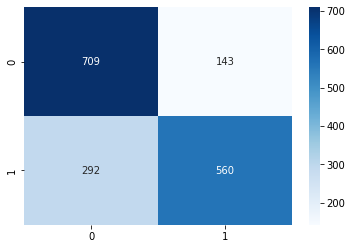

In [49]:
import xgboost
xgbrf = xgboost.XGBRFClassifier()
xgbrf.fit(X_train,y_train)
y_pred_xg = xgbrf.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [50]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       852
         1.0       0.80      0.66      0.72       852

    accuracy                           0.74      1704
   macro avg       0.75      0.74      0.74      1704
weighted avg       0.75      0.74      0.74      1704



### K-Fold

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=5, random_state=1, shuffle=True)
xgbrf_k = xgboost.XGBRFClassifier()
# evaluate model
scores = cross_val_score(xgbrf_k, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.742 (0.008)


### Scaler

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)

<AxesSubplot:>

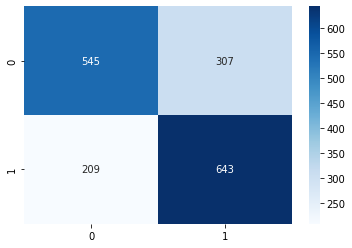

In [53]:
xgbrf_s = xgboost.XGBRFClassifier()
xgbrf_s.fit(X_train_scaled,y_train)
y_pred_xg_s = xgbrf_s.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_xg_s)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [54]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       852
         1.0       0.80      0.66      0.72       852

    accuracy                           0.74      1704
   macro avg       0.75      0.74      0.74      1704
weighted avg       0.75      0.74      0.74      1704



### Grid Search

In [55]:
param_grid = {'n_estimators': [25,50,75,100,300]}  
   
grid = GridSearchCV(xgboost.XGBRFClassifier(), param_grid, refit=True, verbose=3, n_jobs=-1) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print(grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 75}


<AxesSubplot:>

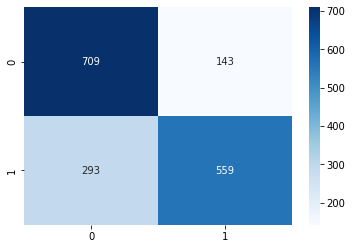

In [56]:
grid_predictions = grid.predict(X_test) 
cf_matrix = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [57]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.76       852
         1.0       0.80      0.66      0.72       852

    accuracy                           0.74      1704
   macro avg       0.75      0.74      0.74      1704
weighted avg       0.75      0.74      0.74      1704



### Combine (Scaled, Gridsearch)

In [58]:
param_grid = {'n_estimators': [25,50,75,100,300]}  
   
grid_s = GridSearchCV(xgboost.XGBRFClassifier(), param_grid, refit=True, verbose=3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_s.fit(X_train_scaled, y_train) 

# print best parameter after tuning 
print(grid_s.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 75}


<AxesSubplot:>

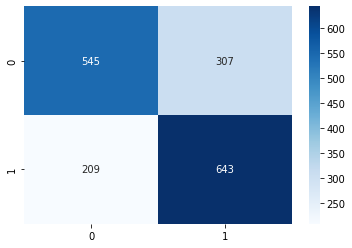

In [59]:
grid_predictions_s = grid_s.predict(X_test) 
cf_matrix = confusion_matrix(y_test, grid_predictions_s)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [60]:
print(classification_report(y_test, grid_predictions_s))

              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68       852
         1.0       0.68      0.75      0.71       852

    accuracy                           0.70      1704
   macro avg       0.70      0.70      0.70      1704
weighted avg       0.70      0.70      0.70      1704



### All features

<AxesSubplot:>

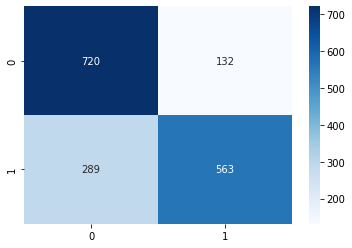

In [61]:
import xgboost
xgbrf_ori= xgboost.XGBRFClassifier()
xgbrf_ori.fit(X_train_ori,y_train_ori)
y_pred_xg_ori = xgbrf_ori.predict(X_test_ori)

cf_matrix = confusion_matrix(y_test_ori, y_pred_xg_ori)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [62]:
print(classification_report(y_test_ori, y_pred_xg_ori))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       852
         1.0       0.81      0.66      0.73       852

    accuracy                           0.75      1704
   macro avg       0.76      0.75      0.75      1704
weighted avg       0.76      0.75      0.75      1704



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

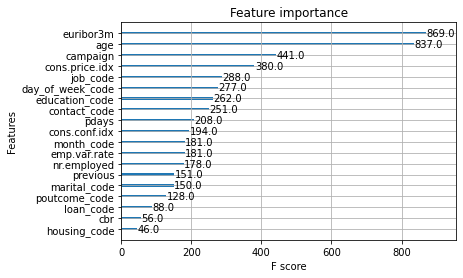

In [63]:
xgboost.plot_importance(xgbrf_ori)

### Feature Importance

In [64]:
X_fi_ori = new_df[["euribor3m","age","campaign","day_of_week_code","job_code","cons.price.idx","pdays"]]
y_fi_ori = new_df["y_code"]

In [65]:
X_train_ori_fi, X_test_ori_fi, y_train_ori_fi, y_test_ori_fi = train_test_split(X_ori, y_ori, test_size=0.2, random_state=42, stratify=y)

<AxesSubplot:>

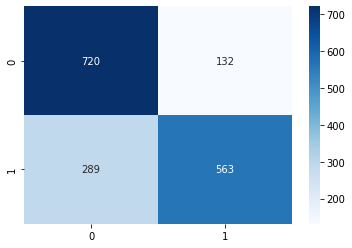

In [66]:
xgbrf_ori_fi= xgboost.XGBRFClassifier()
xgbrf_ori_fi.fit(X_train_ori_fi,y_train_ori_fi)
y_pred_xg_ori_fi = xgbrf_ori_fi.predict(X_test_ori_fi)

cf_matrix = confusion_matrix(y_test_ori_fi, y_pred_xg_ori_fi)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [67]:
print(classification_report(y_test_ori, y_pred_xg_ori_fi))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       852
         1.0       0.81      0.66      0.73       852

    accuracy                           0.75      1704
   macro avg       0.76      0.75      0.75      1704
weighted avg       0.76      0.75      0.75      1704



### Gridsearch + Feature Importance

In [68]:
param_grid = {'n_estimators': [25,50,75,100,300]}  
   
grid_fi = GridSearchCV(xgboost.XGBRFClassifier(), param_grid, refit=True, verbose=3, n_jobs=-1) 
   
# fitting the model for grid search 
grid_fi.fit(X_train_ori_fi, y_train_ori_fi) 

# print best parameter after tuning 
print(grid_fi.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 300}


<AxesSubplot:>

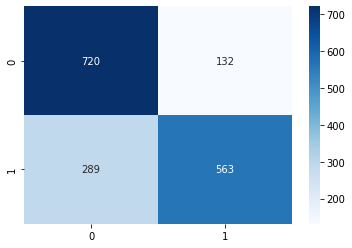

In [69]:
grid_predictions_fi = grid_fi.predict(X_test_ori_fi) 
cf_matrix = confusion_matrix(y_test_ori_fi, grid_predictions_fi)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [70]:
print(classification_report(y_test_ori, grid_predictions_fi))

              precision    recall  f1-score   support

         0.0       0.71      0.85      0.77       852
         1.0       0.81      0.66      0.73       852

    accuracy                           0.75      1704
   macro avg       0.76      0.75      0.75      1704
weighted avg       0.76      0.75      0.75      1704



## Logistic Regression

<AxesSubplot:>

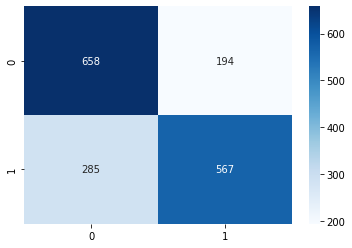

In [71]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [72]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       852
         1.0       0.75      0.67      0.70       852

    accuracy                           0.72      1704
   macro avg       0.72      0.72      0.72      1704
weighted avg       0.72      0.72      0.72      1704



### K-Fold

In [73]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
lr_k = LogisticRegression()
# evaluate model
scores = cross_val_score(lr_k, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.717 (0.006)


### GridSearch

In [74]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.1,0.2,0.3,0.4,0.5]
test_param = {'penalty':penalty, 'C':C, 'solver':solver}
clf = GridSearchCV(LogisticRegression(), test_param)
clf.fit(X_train, y_train)
clf.best_params_


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

{'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}

<AxesSubplot:>

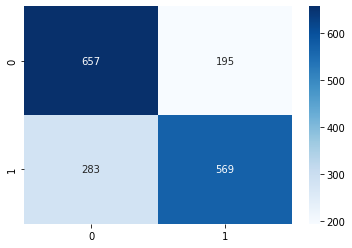

In [75]:
grid_predictions_lr = clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, grid_predictions_lr)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [76]:
print(classification_report(y_test, grid_predictions_lr))

              precision    recall  f1-score   support

         0.0       0.70      0.77      0.73       852
         1.0       0.74      0.67      0.70       852

    accuracy                           0.72      1704
   macro avg       0.72      0.72      0.72      1704
weighted avg       0.72      0.72      0.72      1704



### Logistic Regression Full Features

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

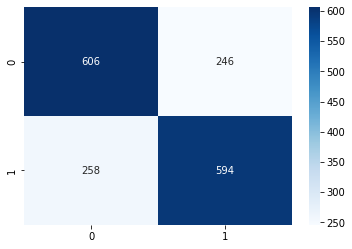

In [77]:
lr_ff=LogisticRegression()
lr_ff.fit(X_train_ori,y_train_ori)
y_pred_lr_ori=lr_ff.predict(X_test_ori)

cf_matrix = confusion_matrix(y_test_ori, y_pred_lr_ori)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [78]:
print(classification_report(y_test_ori, y_pred_lr_ori))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71       852
         1.0       0.71      0.70      0.70       852

    accuracy                           0.70      1704
   macro avg       0.70      0.70      0.70      1704
weighted avg       0.70      0.70      0.70      1704



# Oversampling (SMOTE)

### Train-test split from full data

In [79]:
df2 = df2.select_dtypes(exclude=['object'])
X_df2 = df2.drop(["y_code","duration","default_code"],axis=1)
y_df2 = df2["y_code"]

X_train_df2, X_test_df2, y_train_df2, y_test_df2 = train_test_split(X_df2, y_df2, test_size=0.2, random_state=42, stratify=y_df2)

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

X_train_df2, y_train_df2 = sm.fit_resample(X_train_df2, y_train_df2)

In [81]:
y_test_df2.value_counts()

0.0    6797
1.0     852
Name: y_code, dtype: int64

## Modeling

### XGBOOST

<AxesSubplot:>

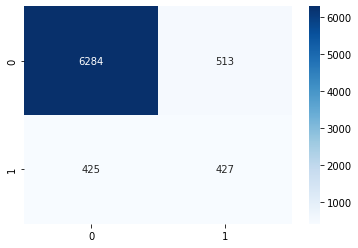

In [82]:
xgbrf_os = xgboost.XGBRFClassifier()
xgbrf_os.fit(X_train_df2,y_train_df2)
y_pred_xg_os = xgbrf_os.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_xg_os)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [83]:
print(classification_report(y_test_df2, y_pred_xg_os))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      6797
         1.0       0.45      0.50      0.48       852

    accuracy                           0.88      7649
   macro avg       0.70      0.71      0.70      7649
weighted avg       0.88      0.88      0.88      7649



### Logistic Regression

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

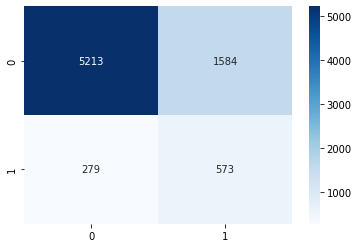

In [84]:
lr_os=LogisticRegression()
lr_os.fit(X_train_df2,y_train_df2)
y_pred_lr_os=lr_os.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_lr_os)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [85]:
print(classification_report(y_test_df2, y_pred_lr_os))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      6797
         1.0       0.27      0.67      0.38       852

    accuracy                           0.76      7649
   macro avg       0.61      0.72      0.61      7649
weighted avg       0.87      0.76      0.80      7649



# Test with full data

Testing all of the models using the same test data to compare each model equall

## XGBOOST

### XGBOOST RF Best (Undersample)

In [86]:
X_test_df2_us_no = X_test_df2[["pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed", "contact_code"]]

<AxesSubplot:>

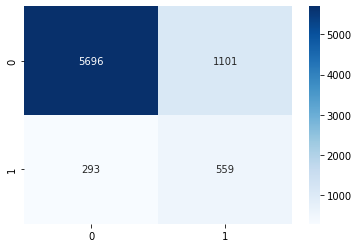

In [87]:
y_pred_xg = xgbrf.predict(X_test_df2_us_no)

cf_matrix = confusion_matrix(y_test_df2, y_pred_xg)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [88]:
print(classification_report(y_test_df2, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      6797
         1.0       0.34      0.66      0.45       852

    accuracy                           0.82      7649
   macro avg       0.64      0.75      0.67      7649
weighted avg       0.88      0.82      0.84      7649



### XGBOOST full features (UnderSample)

<AxesSubplot:>

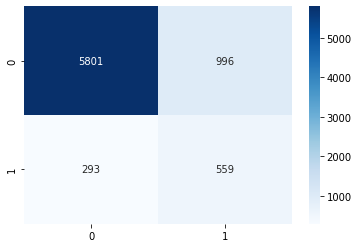

In [89]:
y_pred_xg_ori = xgbrf_ori.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_xg_ori)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [90]:
print(classification_report(y_test_df2, y_pred_xg_ori))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      6797
         1.0       0.36      0.66      0.46       852

    accuracy                           0.83      7649
   macro avg       0.66      0.75      0.68      7649
weighted avg       0.89      0.83      0.85      7649



### XGBOOST RF (Oversample)

<AxesSubplot:>

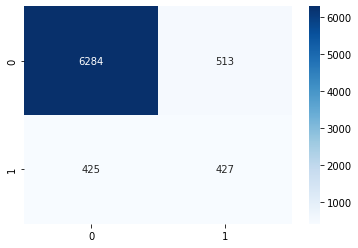

In [91]:
y_pred_xg_os = xgbrf_os.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_xg_os)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [92]:
print(classification_report(y_test_df2, y_pred_xg_ori))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      6797
         1.0       0.36      0.66      0.46       852

    accuracy                           0.83      7649
   macro avg       0.66      0.75      0.68      7649
weighted avg       0.89      0.83      0.85      7649



## Logistic Regression

### Logistic Regression (Undersample)

<AxesSubplot:>

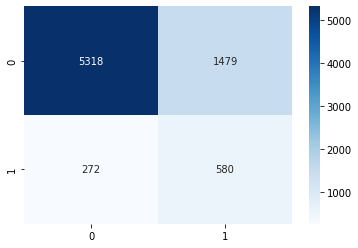

In [93]:
y_pred_lr = clf.predict(X_test_df2_us_no)

cf_matrix = confusion_matrix(y_test_df2, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [94]:
print(classification_report(y_test_df2, y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      6797
         1.0       0.34      0.66      0.45       852

    accuracy                           0.82      7649
   macro avg       0.64      0.75      0.67      7649
weighted avg       0.88      0.82      0.84      7649



### Logistic Regression (Full features)

<AxesSubplot:>

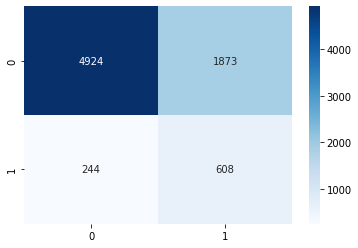

In [95]:
y_pred_lr_ff = lr_ff.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_lr_ff)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [96]:
print(classification_report(y_test_df2, y_pred_lr_ff))

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82      6797
         1.0       0.25      0.71      0.36       852

    accuracy                           0.72      7649
   macro avg       0.60      0.72      0.59      7649
weighted avg       0.87      0.72      0.77      7649



### Logistic Regression (Oversample)

<AxesSubplot:>

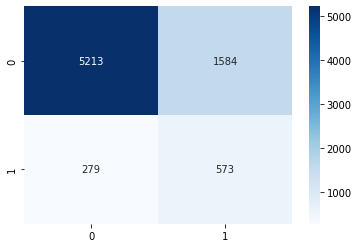

In [97]:
y_pred_lr_os = lr_os.predict(X_test_df2)

cf_matrix = confusion_matrix(y_test_df2, y_pred_lr_os)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')

In [98]:
print(classification_report(y_test_df2, y_pred_lr_os))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      6797
         1.0       0.27      0.67      0.38       852

    accuracy                           0.76      7649
   macro avg       0.61      0.72      0.61      7649
weighted avg       0.87      0.76      0.80      7649



# Discussion

The best model for predicting a client that subscribe to a term deposit is **XGBOOST** with using undersample or oversample and using all of the features of the dataframe.

Both the undersample and over sample have the same **accuracy score of 84** with both have an excellent score for predicting the "No" class.

Using a third-party data must have a systematic approach to ensure reliability and effectiveness of the model. The selection for the third party data should **align with the objective of the model.** A meticulous examination of data quality is crucial, involving checks for consistency, accuracy, and potential biases. 

Conducting exploratory data analysis (EDA) on the third-party data allows us to comprehend its nuances and identify patterns or anomalies. Subsequently,establish testing and evaluation procedures to measure the impact of the external data on the model's performance is a must. Ongoing monitoring and maintenance strategies are crucial in a production environment, ensuring that the third-party data remains relevant and does not compromise the integrity of the model.